# IMPORT LIBRARIES

In [112]:
# Import necessary libraries
import BiQ_Common_Fxns as BiQ
import numpy as np  # for numerical operations
import pandas as pd  # for data manipulation and analysis
import matplotlib.pyplot as plt  # for creating plots
import itertools  # for iterators and looping functions
import math  # for mathematical operations
import statsmodels.formula.api as smf  # for statistical modeling
import statsmodels.api as sm  # for statistical analysis and modeling
from itertools import combinations

# EXTRACT DATA FROM WORKSHEET

In [113]:
# Initialize a global variable to store DataFrame read from Excel
global_df = None

def read_excel_file(file_path):
    """Reads an Excel file and returns a DataFrame."""
    global global_df  # Access the global DataFrame variable
    try:
        df = pd.read_excel(file_path)  # Read Excel file into a temporary DataFrame
        df = df.dropna(axis=1, how='all')  # Drop columns that are entirely blank
        global_df = df.copy()  # Assign the modified DataFrame to the global variable
        return global_df  # Return the DataFrame
    except Exception as e:
        print(f"Error reading Excel file: {e}")  # Print error message if file reading fails
        return None  # Return None if an error occurs

def extract_factor_values(df, factors_column):
    """Extracts unique factor values from the specified column."""
    try:
        factor_values = df[factors_column].dropna().unique()  # Extract unique factor values from specified column
        return factor_values  # Return the unique factor values
    except Exception as e:
        print(f"Error extracting factor values: {e}")  # Print error message if extraction fails
        return None  # Return None if an error occurs

def process_excel_file(file_paths):
    """Processes the selected Excel file."""
    if file_paths:  # Check if file paths are provided
        results_file = file_paths[0]  # Get the first file path from the list
        factors_column = 'Factor'  # Define the column name containing factors
        df = read_excel_file(results_file)  # Read Excel file into DataFrame
        if df is not None:  # Check if DataFrame is successfully loaded
            factor_values = extract_factor_values(df, factors_column)  # Extract factor values from DataFrame
            return df, factor_values  # Return the DataFrame and factor values
    return None, None  # Return None for DataFrame and factor values if file loading fails

def main():
    file_paths, _ = BiQ.open_file_dialog()  # Open a file dialog to select Excel file(s)

    if file_paths:  # Check if file paths are provided
        results_file = file_paths[0]  # Get the first file path from the list
        df = read_excel_file(results_file)  # Read Excel file into DataFrame
        if df is not None:  # Check if DataFrame is successfully loaded
            # Perform additional processing logic here
            pass
    else:
        print("No file selected.")  # Print message if no file is selected

    # print the global DataFrame
    print(global_df)  # print the global DataFrame

# Call the main function if the script is executed directly
if __name__ == "__main__":
    main()


Selected files:
C:/Users/ChrisSaid/Boulder BioMed/Engineering - Documents/Cerapedics/3- Consultant Working Documents/Pulverizing Sieving/Sieve Counterweight Adjustment Study/Sieve Counterweight Study Data and Analysis.xlsx [Sieve Counterweight Study Data and Analysis.xlsx]
   Factor   Data Type  Levels  UCW  LCW  LA    Results
0     UCW  Continuous     3.0    0    0   0   0.567000
1     LCW  Continuous     2.0    0    0   0   2.203000
2      LA  Continuous     2.0    0    0   0  14.351000
3     NaN         NaN     NaN    0    0   1   1.509042
4     NaN         NaN     NaN    0    0   1   0.099521
5     NaN         NaN     NaN    0    0   1  15.703818
6     NaN         NaN     NaN    0    1   0   0.555182
7     NaN         NaN     NaN    0    1   0   0.114544
8     NaN         NaN     NaN    0    1   0   8.239513
9     NaN         NaN     NaN    0    1   1   0.098400
10    NaN         NaN     NaN    0    1   1   0.096376
11    NaN         NaN     NaN    0    1   1   4.068230
12    NaN  

# ANALYSIS

## MAIN EFFECTS PLOT

In [114]:
# Define a function to plot main effects
def main_effects_plot(df):
    """Plots main effects based on the DataFrame."""
    if df is None:
        print("DataFrame is empty.")
        return
    
    factors_column = 'Factor'
    results_column = 'Results'
    
    # Extract unique factor values from the 'Factor' column
    factors = df[factors_column].dropna().unique()
    
    # Calculate main effects using extracted factors
    main_effects = {}
    for factor in factors:
        mean_plus = df[df[factors_column] == factor][results_column].mean()
        mean_minus = df[df[factors_column] != factor][results_column].mean()
        main_effects[factor] = mean_plus - mean_minus

    # Plot main effects
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.bar(main_effects.keys(), main_effects.values())
    ax.set_ylabel('Main Effect')
    ax.set_title('Main Effects Plot')
    plt.xticks(rotation=45, ha="right")
    plt.show()


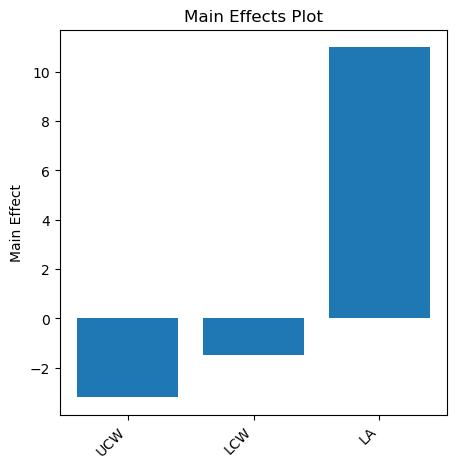

In [115]:
# Call the function
main_effects_plot(global_df)

## INTERACTION PLOTS

### INTERACTION EFFECTS PLOT

In [116]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt

def interaction_effects_plot(df, results_column):
    """
    Plots interaction effects based on the DataFrame and results_column.
    
    Args:
    - df (pd.DataFrame): DataFrame containing the data.
    - results_column (str): Name of the column containing the results.
    """
    if df is None or df.empty:
        print("DataFrame is empty.")
        return

    # Extract columns based on the 'Factor' column in the DataFrame
    factor_column = 'Factor'
    factors = df[factor_column].dropna().unique()
    interest_columns = [col for col in df.columns if col not in [factor_column, results_column] and col in factors]

    # Generate interactions based on interest_columns
    interactions = list(itertools.combinations(interest_columns, 2))

    interaction_labels = []
    interaction_effects = []

    for interaction in interactions:
        try:
            # Adjust the grouping based on factor levels encoding
            grouped = df.groupby(list(interaction))[results_column].mean()

            # Get all possible levels for each factor in the interaction
            levels_combinations = [grouped.index.levels[i] for i in range(len(interaction))]
            
            # Generate all combinations of factor levels for interaction effects calculation
            factor_level_combinations = itertools.product(*levels_combinations)
            
            # Calculate interaction effects for each combination of factor levels
            interaction_effect = sum(grouped[comb] for comb in factor_level_combinations) / len(levels_combinations)

            interaction_labels.append(f"{interaction[0]} x {interaction[1]}")
            interaction_effects.append(interaction_effect)
        except KeyError:
            print(f"Interaction {interaction} not found in the data. Skipping.")
            continue

    if interaction_labels and interaction_effects:
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.bar(interaction_labels, interaction_effects)

        for i, v in enumerate(interaction_effects):
            ax.text(i, v + 0.01 * max(interaction_effects), round(v, 2), ha='center', va='bottom')

        ax.set_ylabel("Interaction Effect")
        ax.set_title("Two-way Interaction Effects")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()
    else:
        print("No valid interaction effects found.")



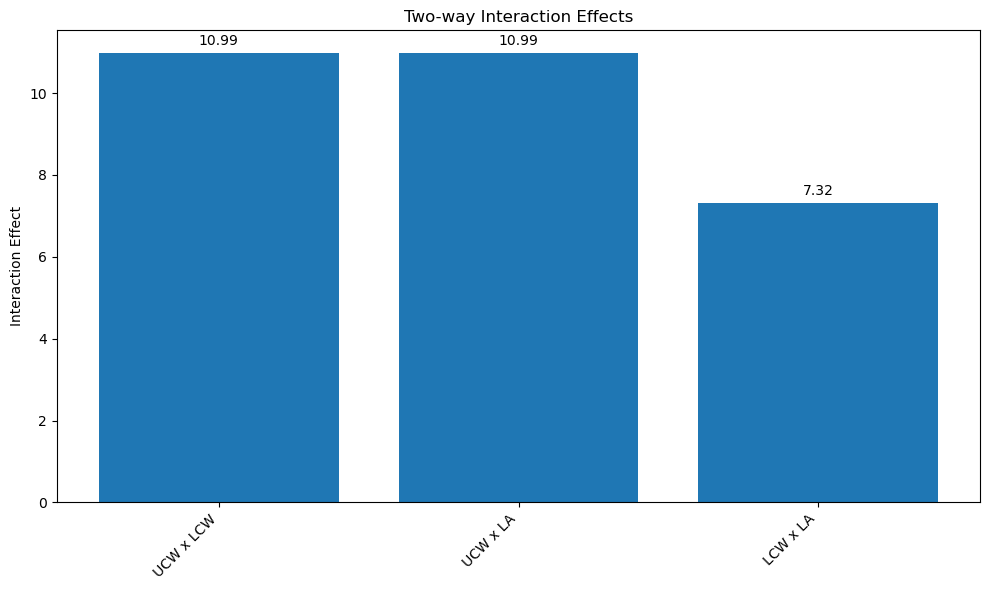

In [117]:
interaction_effects_plot(global_df, 'Results')

### INTERACTION POINT PLOT

In [118]:
def interaction_point_plot(df, results_column):
    """
    Plots interaction point plot based on the DataFrame and results_column.
    
    Args:
    - df (pd.DataFrame): DataFrame containing the data.
    - results_column (str): Name of the column containing the results.
    """
    if df is None:
        print("DataFrame is empty.")
        return
    
    factors_column = 'Factor'
    
    # Extract unique factor values from the 'Factor' column
    factors = df[factors_column].dropna().unique()

    # Filter combinations to include only those involving factors
    interactions = list(itertools.combinations(factors, 2))

    cols = 3
    rows = math.ceil(len(interactions) / cols)
    fig, axs = plt.subplots(rows, cols, figsize=(10, 10*rows/3))

    for idx, interaction in enumerate(interactions):
        row = idx // cols
        col = idx % cols
        ax = axs[row, col] if rows > 1 else axs[col]

        for level in [-1, 1]:
            subset = df[df[interaction[0]] == level]
            ax.plot(subset[interaction[1]].unique(), subset.groupby(interaction[1])[results_column].mean(), 'o-', label=f'{interaction[0]} = {level}')

        ax.set_title(f'{interaction[0]} x {interaction[1]}')
        ax.legend()
        ax.grid(True)

    for idx in range(len(interactions), rows*cols):
        row = idx // cols
        col = idx % cols
        axs[row, col].axis('off')

    plt.tight_layout()
    plt.show()

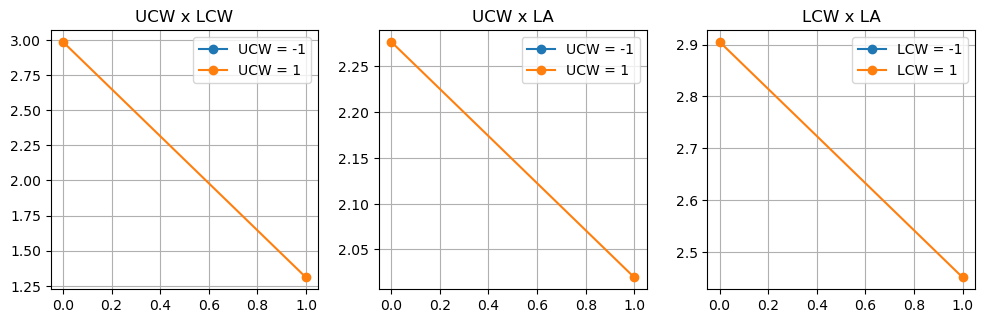

In [119]:
interaction_point_plot(global_df, 'Results')

## ANOVA TABLE / MODEL SUMMARY

In [120]:
import pandas as pd
import statsmodels.formula.api as smf
from itertools import combinations

def generate_anova_table(df):
    # Check and clean column names
    df.columns = df.columns.str.strip()

    # Check if 'Results' column exists in the DataFrame
    if 'Results' not in df.columns:
        raise ValueError("'Results' column not found in the DataFrame.")

    # Print the DataFrame to check data processing
    print("Processed DataFrame:")
    print(df)

    # Separate categorical and continuous variables based on 'Data Type'
    cat_cols = df.loc[df['Data Type'] == 'Categorical', 'Factor'].tolist()

    # Construct the formula string
    formula_parts = []
    if cat_cols:
        formula_parts.append(' + '.join([f'C({col})' for col in cat_cols]))

    if not formula_parts:
        raise ValueError("No categorical variables found in the DataFrame.")

    formula_string = f'Results ~ {" + ".join(formula_parts)}'

    # Create interactions between factors directly in the formula
    interactions = list(combinations(cat_cols, 2))
    interaction_terms = [f'C({f1}):C({f2})' for f1, f2 in interactions]
    formula_string += ' + ' + ' + '.join(interaction_terms)

    print("\nConstructed Formula:", formula_string)

    try:
        # Fit the model using the formula
        model = smf.ols(formula_string, data=df).fit()
        print(model.summary())
        return model
    except Exception as e:
        print("Error occurred during model generation:", e)

        # Call the function with your DataFrame
try:
    model = generate_anova_table(global_df)
except Exception as e:
    print("Error occurred during model generation:", e)

Processed DataFrame:
   Factor   Data Type  Levels  UCW  LCW  LA    Results
0     UCW  Continuous     3.0    0    0   0   0.567000
1     LCW  Continuous     2.0    0    0   0   2.203000
2      LA  Continuous     2.0    0    0   0  14.351000
3     NaN         NaN     NaN    0    0   1   1.509042
4     NaN         NaN     NaN    0    0   1   0.099521
5     NaN         NaN     NaN    0    0   1  15.703818
6     NaN         NaN     NaN    0    1   0   0.555182
7     NaN         NaN     NaN    0    1   0   0.114544
8     NaN         NaN     NaN    0    1   0   8.239513
9     NaN         NaN     NaN    0    1   1   0.098400
10    NaN         NaN     NaN    0    1   1   0.096376
11    NaN         NaN     NaN    0    1   1   4.068230
12    NaN         NaN     NaN    1    0   0   0.078842
13    NaN         NaN     NaN    1    0   0   1.403789
14    NaN         NaN     NaN    1    0   0  11.508492
15    NaN         NaN     NaN    1    0   1   0.088115
16    NaN         NaN     NaN    1    0   1 

## MODEL DIAGNOSTICS

In [121]:
def diagnostic_plots(model):
    # Extract residuals and predicted values from the model
    residuals = model.resid
    predicted = model.fittedvalues
    
    # Create subplots with one row and three columns
    fig, axs = plt.subplots(1, 3, figsize=(12, 5))  # Creating a figure and axes for subplots
    
    # Residuals vs Fits
    axs[0].scatter(predicted, residuals, edgecolors='k', facecolors='none')  # Scatter plot of predicted vs residuals
    axs[0].axhline(y=0, color='k', linestyle='dashed', linewidth=1)  # Horizontal line at y=0
    axs[0].set_title('Residuals vs. Fits')  # Setting title for the subplot
    axs[0].set_xlabel('Fit values')  # Setting label for x-axis
    axs[0].set_ylabel('Residuals')  # Setting label for y-axis
    
    # Residuals vs. Order (Order of Data Collection)
    axs[1].scatter(range(len(residuals)), residuals, edgecolors='k', facecolors='none')  # Scatter plot of residuals vs runs
    axs[1].axhline(y=0, color='k', linestyle='dashed', linewidth=1)  # Horizontal line at y=0
    axs[1].set_title('Residuals vs. Order')  # Setting title for the subplot
    axs[1].set_xlabel('Order')  # Setting label for x-axis
    axs[1].set_ylabel('Residuals')  # Setting label for y-axis
    
    # Q-Q plot
    sm.qqplot(residuals, line='45', fit=True, ax=axs[2])  # Q-Q plot of residuals
    axs[2].set_title('Q-Q Plot')  # Setting title for the subplot
    
    plt.tight_layout()  # Adjusting layout to prevent overlap
    plt.show()  # printing the plots

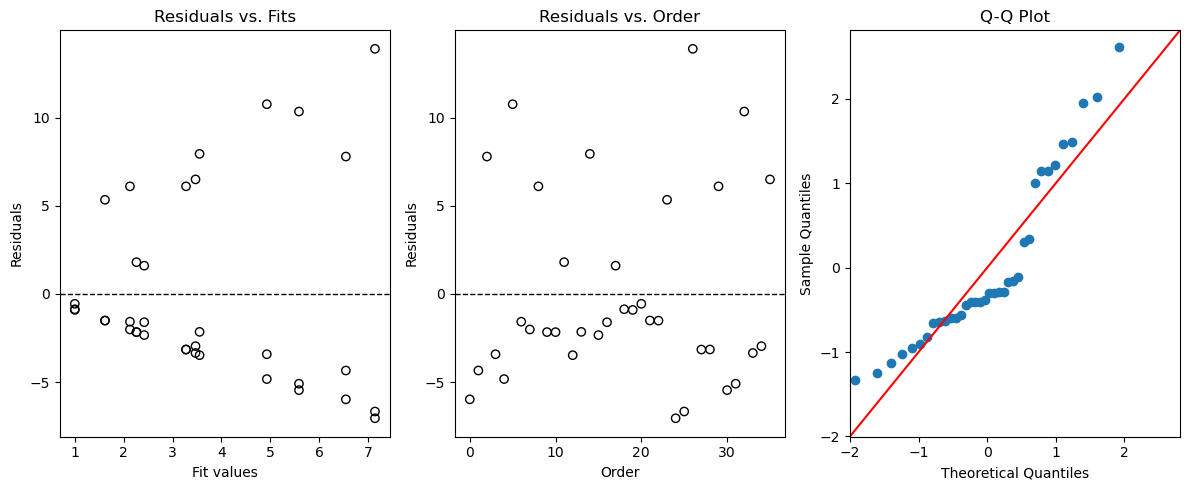

In [122]:
diagnostic_plots(model)

## 3D SURFACE PLOTS

### HELD VALUE = 1

TypeError: '<=' not supported between instances of 'str' and 'float'

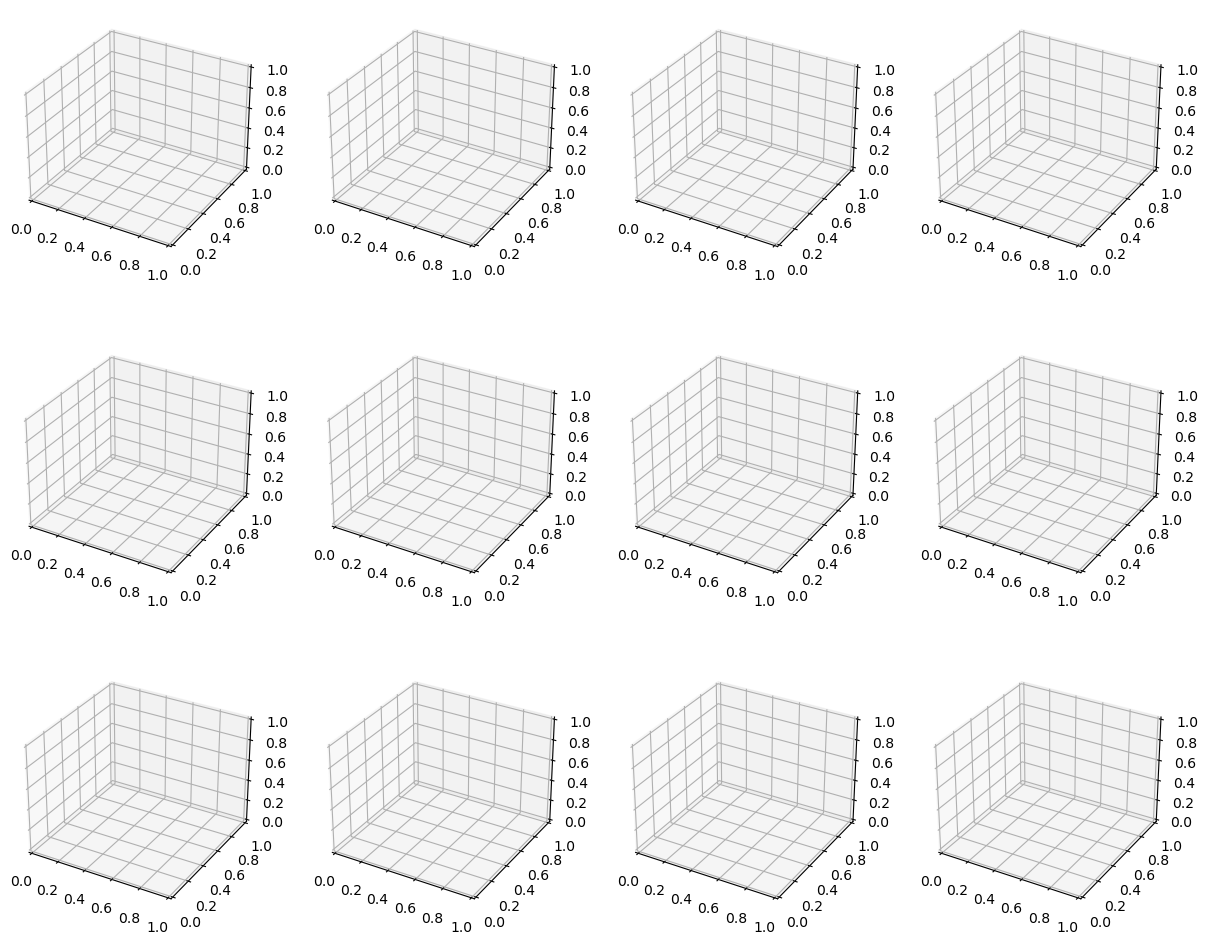

In [123]:
# Define the function to plot 3D surface with held value = 1
def plot_3D_surface(title, df, model, held_value, num_values=10):
    # Filter out columns that you don't want
    factors = [col for col in df.columns if col not in ['Factor', 'Levels', '', 'Results'] and col is not None]

    # Generate all possible combinations of factors for x_name and y_name
    factor_combinations_xy = list(itertools.permutations(factors, 2))

    # Create subplots
    num_plots = len(factor_combinations_xy)
    num_rows = (num_plots + 3) // 4  # Round up to the nearest multiple of 4
    fig, axes = plt.subplots(num_rows, 4, figsize=(15, num_rows * 4), subplot_kw={'projection': '3d'})
    
    # Iterate through combinations for x_name and y_name
    for i, (x_name, y_name) in enumerate(factor_combinations_xy):
        # Identify held factors
        held_factors = [factor for factor in factors if factor != x_name and factor != y_name]
        
        # Get min and max values for x and y
        x_min, x_max = df[x_name].min(), df[x_name].max()
        y_min, y_max = df[y_name].min(), df[y_name].max()
        
        # Create a DataFrame with all possible values for x and y
        x_values = np.linspace(x_min, x_max, num_values)
        y_values = np.linspace(y_min, y_max, num_values)
        A_values, B_values = np.meshgrid(x_values, y_values)
        Z = np.zeros((len(y_values), len(x_values)))

        # Predict using the model and store data in a dataframe
        for j, y_val in enumerate(y_values):
            for k, x_val in enumerate(x_values):
                df_pred = pd.DataFrame({
                    x_name: [x_val],
                    y_name: [y_val],
                    **{held_factor: [held_value] for held_factor in held_factors}
                })
                result = model.predict(df_pred)[0]
                Z[j, k] = result
        
        # Plotting the surface
        ax = axes[i // 4, i % 4]
        ax.plot_surface(A_values, B_values, Z, cmap='viridis', alpha=0.6)
        
        ax.set_xlabel(x_name)
        ax.set_ylabel(y_name)
        ax.set_zlabel('Results')
        ax.set_title(f'{title} {y_name} vs. {x_name} \nwith factors {", ".join(held_factors)} held at {held_value}')
    
    plt.tight_layout()
    plt.show()

# Call the function to plot 3D surface with held value = 1
plot_3D_surface("3D Surface Plot", global_df, model, 1)


### HELD VALUE = -1

In [ ]:
# Define the function to plot 3D surface with held value = 1
def plot_3D_surface(title, df, model, held_value, num_values=10):
    # Filter out columns that you don't want
    factors = [col for col in df.columns if col not in ['Factor', 'Levels', '', 'Results'] and col is not None]

    # Generate all possible combinations of factors for x_name and y_name
    factor_combinations_xy = list(itertools.permutations(factors, 2))

    # Create subplots
    num_plots = len(factor_combinations_xy)
    num_rows = (num_plots + 3) // 4  # Round up to the nearest multiple of 4
    fig, axes = plt.subplots(num_rows, 4, figsize=(15, num_rows * 4), subplot_kw={'projection': '3d'})
    
    # Iterate through combinations for x_name and y_name
    for i, (x_name, y_name) in enumerate(factor_combinations_xy):
        # Identify held factors
        held_factors = [factor for factor in factors if factor != x_name and factor != y_name]
        
        # Get min and max values for x and y
        x_min, x_max = df[x_name].min(), df[x_name].max()
        y_min, y_max = df[y_name].min(), df[y_name].max()
        
        # Create a DataFrame with all possible values for x and y
        x_values = np.linspace(x_min, x_max, num_values)
        y_values = np.linspace(y_min, y_max, num_values)
        A_values, B_values = np.meshgrid(x_values, y_values)
        Z = np.zeros((len(y_values), len(x_values)))

        # Predict using the model and store data in a dataframe
        for j, y_val in enumerate(y_values):
            for k, x_val in enumerate(x_values):
                df_pred = pd.DataFrame({
                    x_name: [x_val],
                    y_name: [y_val],
                    **{held_factor: [held_value] for held_factor in held_factors}
                })
                result = model.predict(df_pred)[0]
                Z[j, k] = result
        
        # Plotting the surface
        ax = axes[i // 4, i % 4]
        ax.plot_surface(A_values, B_values, Z, cmap='viridis', alpha=0.6)
        
        ax.set_xlabel(x_name)
        ax.set_ylabel(y_name)
        ax.set_zlabel('Results')
        ax.set_title(f'{title} {y_name} vs. {x_name} \nwith factors {", ".join(held_factors)} held at {held_value}')
    
    plt.tight_layout()
    plt.show()

# Call the function to plot 3D surface with held value = 1
plot_3D_surface("3D Surface Plot", global_df, model, -1)


## CONTOUR PLOTS

### HELD VALUE = 1

In [ ]:
# Define the function to plot contour with held value = 1
def plot_contour(title, df, model, held_value, num_values=10):
    # Filter out columns that you don't want
    factors = [col for col in df.columns if col not in ['Factor', 'Levels', '', 'Results'] and col is not None]

    # Generate all possible combinations of factors for x_name and y_name
    factor_combinations_xy = list(itertools.permutations(factors, 2))

    # Create subplots
    num_plots = len(factor_combinations_xy)
    num_rows = (num_plots + 3) // 4  # Round up to the nearest multiple of 4
    fig, axes = plt.subplots(num_rows, 4, figsize=(15, num_rows * 4))
    
    # Iterate through combinations for x_name and y_name
    for i, (x_name, y_name) in enumerate(factor_combinations_xy):
        # Identify held factors
        held_factors = [factor for factor in factors if factor != x_name and factor != y_name]
        
        # Get min and max values for x and y
        x_min, x_max = df[x_name].min(), df[x_name].max()
        y_min, y_max = df[y_name].min(), df[y_name].max()
        
        # Create a DataFrame with all possible values for x and y
        x_values = np.linspace(x_min, x_max, num_values)
        y_values = np.linspace(y_min, y_max, num_values)
        A_values, B_values = np.meshgrid(x_values, y_values)
        Z = np.zeros((len(y_values), len(x_values)))

        # Predict using the model and store data in a dataframe
        for j, y_val in enumerate(y_values):
            for k, x_val in enumerate(x_values):
                df_pred = pd.DataFrame({
                    x_name: [x_val],
                    y_name: [y_val],
                    **{held_factor: [held_value] for held_factor in held_factors}
                })
                result = model.predict(df_pred)[0]
                Z[j, k] = result
        
        # Plotting the contour plot
        ax = axes[i // 4, i % 4]
        contour = ax.contourf(A_values, B_values, Z, cmap='viridis')
        fig.colorbar(contour, ax=ax)
        
        ax.set_xlabel(x_name)
        ax.set_ylabel(y_name)
        ax.set_title(f'{title} {y_name} vs. {x_name} \nwith factors {", ".join(held_factors)} held at {held_value}')
    
    plt.tight_layout()
    plt.show()

# Call the function to plot contour with held value = 1
plot_contour("Contour Plot", global_df, model, 1)


### HELD VALUE = -1

In [ ]:
# Define the function to plot contour with held value = 1
def plot_contour(title, df, model, held_value, num_values=10):
    # Filter out columns that you don't want
    factors = [col for col in df.columns if col not in ['Factor', 'Levels', '', 'Results'] and col is not None]

    # Generate all possible combinations of factors for x_name and y_name
    factor_combinations_xy = list(itertools.permutations(factors, 2))

    # Create subplots
    num_plots = len(factor_combinations_xy)
    num_rows = (num_plots + 3) // 4  # Round up to the nearest multiple of 4
    fig, axes = plt.subplots(num_rows, 4, figsize=(15, num_rows * 4))
    
    # Iterate through combinations for x_name and y_name
    for i, (x_name, y_name) in enumerate(factor_combinations_xy):
        # Identify held factors
        held_factors = [factor for factor in factors if factor != x_name and factor != y_name]
        
        # Get min and max values for x and y
        x_min, x_max = df[x_name].min(), df[x_name].max()
        y_min, y_max = df[y_name].min(), df[y_name].max()
        
        # Create a DataFrame with all possible values for x and y
        x_values = np.linspace(x_min, x_max, num_values)
        y_values = np.linspace(y_min, y_max, num_values)
        A_values, B_values = np.meshgrid(x_values, y_values)
        Z = np.zeros((len(y_values), len(x_values)))

        # Predict using the model and store data in a dataframe
        for j, y_val in enumerate(y_values):
            for k, x_val in enumerate(x_values):
                df_pred = pd.DataFrame({
                    x_name: [x_val],
                    y_name: [y_val],
                    **{held_factor: [held_value] for held_factor in held_factors}
                })
                result = model.predict(df_pred)[0]
                Z[j, k] = result
        
        # Plotting the contour plot
        ax = axes[i // 4, i % 4]
        contour = ax.contourf(A_values, B_values, Z, cmap='viridis')
        fig.colorbar(contour, ax=ax)
        
        ax.set_xlabel(x_name)
        ax.set_ylabel(y_name)
        ax.set_title(f'{title} {y_name} vs. {x_name} \nwith factors {", ".join(held_factors)} held at {held_value}')
    
    plt.tight_layout()
    plt.show()

# Call the function to plot contour with held value = 1
plot_contour("Contour Plot", global_df, model, -1)


## RESPONSE OPTIMIZATION

In [ ]:

def optimize_response(df, model, step_size=None):
    """
    Optimizes the response based on the given model and DataFrame.

    Args:
    - df (pd.DataFrame): DataFrame containing the data.
    - model (statsmodels.regression.linear_model.RegressionResultsWrapper): Fitted regression model.
    - step_size (float or None): Step size for increments. If None, only integers -1 and 1 are used.

    Returns:
    - dict: Dictionary containing the optimized settings and predicted response value.
    """
    if df.empty or model is None:
        return {"Optimized Settings": None, "Optimized Response": None}

    # Define factors
    factors = [col for col in df.columns if col not in ['Factor', 'Levels', 'Results'] and col.strip()]

    # Calculate the number of levels for each factor
    num_levels = {factor: len(df[factor].unique()) for factor in factors}

    # Generate all possible combinations of factor levels
    if step_size is not None:
        value_combinations = itertools.product(np.arange(-1, 1+step_size, step_size), repeat=len(factors))
    else:
        # Generate integers based on the number of levels for each factor
        integers = {factor: [-1, 1] if num_levels[factor] == 2 else [-1, 0, 1] for factor in factors}
        value_combinations = itertools.product(*[integers[factor] for factor in factors])

    # Initialize variables for optimized settings and response value
    optimized_settings = None
    optimized_response = None

    # Iterate over each combination of factor values
    for values in value_combinations:
        
        # Create a DataFrame with the current combination of factor values
        data = pd.DataFrame({factor: [value] for factor, value in zip(factors, values)})
        
        # Predict response for the current combination
        predicted_response = model.predict(data).iloc[0]  # Extract the predicted value
        
        # Check if the predicted response is better than the previous best
        if optimized_response is None or predicted_response > optimized_response:
            optimized_response = predicted_response
            optimized_settings = {factor: value for factor, value in zip(factors, values)}

    return {"Optimized Settings": optimized_settings, "Optimized Response": optimized_response}

# Call the function to optimize response with integers based on the number of levels for each factor
optimization_result_integers = optimize_response(global_df, model)

print("Optimization Result with Integers based on Number of Levels for Each Factor:")
print(optimization_result_integers)